# Hierarchical clustering



In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos=datos.reset_index()
datos.head(4)

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


In [3]:
from sklearn.preprocessing import StandardScaler

#df=datos.apply(scale)
scaler = StandardScaler()
scaler.fit(datos.drop(columns="rownames"))
df=pd.DataFrame(scaler.transform(datos.drop(columns="rownames")), columns=["Murder","Assault","UrbanPop","Rape"])
df=pd.concat([datos["rownames"],df], axis=1, verify_integrity=True)
df.head()

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


In [4]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [8]:
# Modelos
# ==============================================================================
## modelo con linkage complete:
modelo_hclust_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=df.drop(columns="rownames"))

## modelo con linkage average:
modelo_hclust_average = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=df.drop(columns="rownames"))

## modelo con linkage ward:
modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=df.drop(columns="rownames"))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

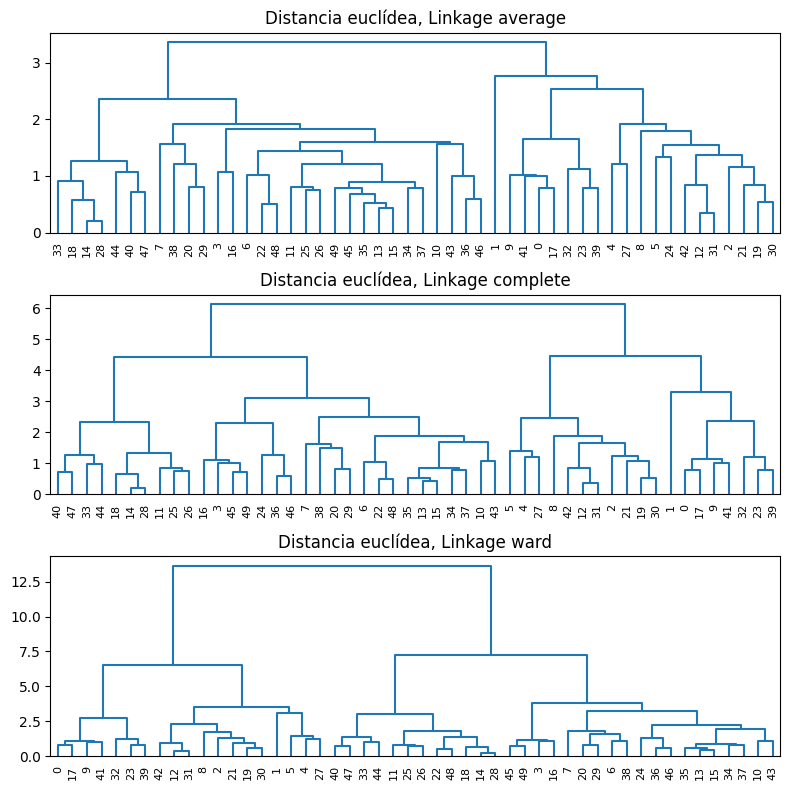

In [10]:
import matplotlib.pyplot as plt

# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();



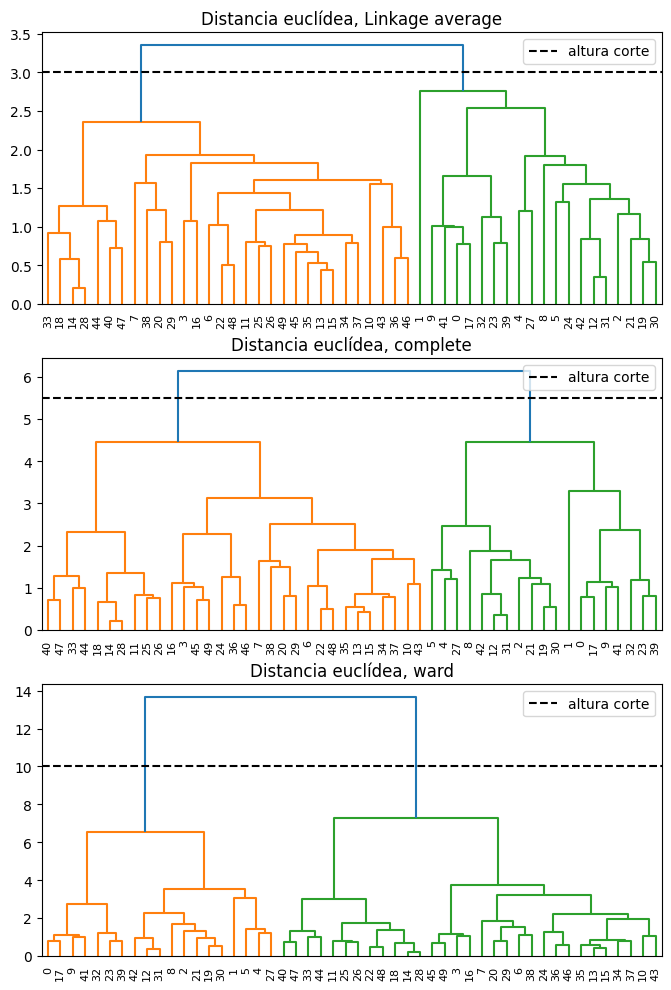

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
altura_corte = 6
plot_dendrogram(modelo_hclust_average, color_threshold=3, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
axs[0].axhline(y=3, c = 'black', linestyle='--', label='altura corte')
axs[0].legend()

plot_dendrogram(modelo_hclust_complete, color_threshold=5.5, ax=axs[1])
axs[1].set_title("Distancia euclídea, complete")
axs[1].axhline(y=5.5, c = 'black', linestyle='--', label='altura corte')
axs[1].legend()

plot_dendrogram(modelo_hclust_ward, color_threshold=10, ax=axs[2])
axs[2].set_title("Distancia euclídea, ward")
axs[2].axhline(y=10, c = 'black', linestyle='--', label='altura corte')
axs[2].legend();

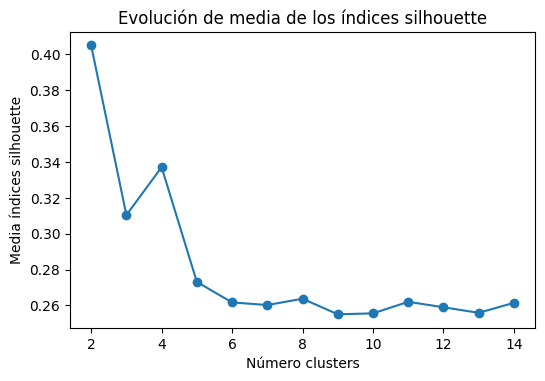

In [16]:


# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df.drop(columns="rownames"))
    silhouette_avg = silhouette_score(df.drop(columns="rownames"), cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');



In [22]:


# Modelo
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 2
                     )
modelo_hclust_ward.fit(X=df.drop(columns="rownames"))



AgglomerativeClustering()

In [23]:
df["cluster"] = modelo_hclust_ward.labels_

In [25]:
datos["cluster"]=df["cluster"]

In [26]:
datos.sort_values(by="cluster")

,rownames,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,0
7,Delaware,5.9,238,72,15.8,0
6,Connecticut,3.3,110,77,11.1,0
15,Kansas,6.0,115,66,18.0,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
24,Missouri,9.0,178,70,28.2,0
25,Montana,6.0,109,53,16.4,0
